<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-latifi/Stock_138_Latifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install statsmodels

In [1]:
# Importing Libraries

# Data Collection
from google.colab import drive

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting data saved in drive
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
None


In [6]:
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [7]:
# Null Values

df.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [8]:
rows_with_missing_target = df[df['target'].isna()]

# Print the extracted rows
rows_with_missing_target

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225338,158,388,510,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21391,388_510_158
4225538,158,388,520,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21392,388_520_158
4225738,158,388,530,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21393,388_530_158
4225938,158,388,540,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21394,388_540_158


In [9]:
set(rows_with_missing_target.stock_id.unique())

{19, 101, 131, 158}

In [10]:
set(df[df['imbalance_size'].isna()].stock_id.unique())

{19, 101, 131, 158}

## **Data Pre Processing**

In [11]:
# selecting stock no. 138

stock_138 = df[df['stock_id'] == 138]

In [12]:
stock_138.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,26455.0,26455.000000,26455.000000,2.645500e+04,26455.00000,26455.000000,2.645500e+04,11830.000000,12025.000000,26455.000000,2.645500e+04,26455.000000,2.645500e+04,26455.000000,26455.000000,26455.000000
mean,138.0,240.000000,270.000000,6.458743e+05,0.13264,1.000159,3.589101e+06,1.001897,1.001055,0.999586,1.569439e+04,1.000700,1.435927e+04,1.000144,-0.009372,13227.000000
std,0.0,138.855064,158.748079,1.919483e+06,0.80177,0.002872,1.245430e+07,0.024368,0.012004,0.002795,4.098003e+04,0.002811,2.507344e+04,0.002802,11.854961,7637.045022
min,138.0,0.000000,0.000000,0.000000e+00,-1.00000,0.988094,8.779419e+04,0.690168,0.897892,0.987094,3.491000e+01,0.988736,3.516000e+01,0.988412,-82.070230,0.000000
25%,138.0,120.000000,130.000000,0.000000e+00,-1.00000,0.998538,6.862313e+05,0.997704,0.997863,0.998027,3.533920e+03,0.999164,3.266330e+03,0.998557,-6.800294,6613.500000
50%,138.0,240.000000,270.000000,1.036891e+05,0.00000,1.000074,1.265160e+06,1.000573,1.000312,0.999537,8.480000e+03,1.000625,8.327000e+03,1.000059,-0.190139,13227.000000
75%,138.0,360.000000,410.000000,4.475324e+05,1.00000,1.001717,2.977653e+06,1.004110,1.003294,1.001095,1.767336e+04,1.002212,1.746300e+04,1.001664,6.744861,19840.500000
max,138.0,480.000000,540.000000,4.741347e+07,1.00000,1.021812,2.703379e+08,1.172526,1.097011,1.020853,1.066821e+06,1.023011,1.806618e+06,1.021354,94.959730,26454.000000


In [13]:
stock_138.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26455 entries, 133 to 5237918
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 26455 non-null  int64  
 1   date_id                  26455 non-null  int64  
 2   seconds_in_bucket        26455 non-null  int64  
 3   imbalance_size           26455 non-null  float64
 4   imbalance_buy_sell_flag  26455 non-null  int64  
 5   reference_price          26455 non-null  float64
 6   matched_size             26455 non-null  float64
 7   far_price                11830 non-null  float64
 8   near_price               12025 non-null  float64
 9   bid_price                26455 non-null  float64
 10  bid_size                 26455 non-null  float64
 11  ask_price                26455 non-null  float64
 12  ask_size                 26455 non-null  float64
 13  wap                      26455 non-null  float64
 14  target            

In [14]:
stock_138.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
133,138,0,0,209818.44,-1,0.999881,416148.04,NaN,NaN,0.999881,1350.36,1.000947,10739.30,1.000000,-8.050203,0,0_0_138
324,138,0,10,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,3753.00,1.000082,-5.409718,1,0_10_138
515,138,0,20,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,20191.14,0.999780,0.900030,2,0_20_138
706,138,0,30,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,23944.14,0.999759,-11.150241,3,0_30_138
897,138,0,40,190235.89,-1,0.999881,435730.59,NaN,NaN,0.999881,3450.92,1.000414,10245.69,1.000015,-1.580119,4,0_40_138


In [15]:
# No. of days tracked for stock 138
days = len(set(stock_138.date_id.unique()))
print("Days:", days)

Days: 481


In [16]:
# Sorting data by date_id and time_id
stock_138 = stock_138.copy()
stock_138.sort_values(by=['date_id', 'time_id'], inplace=True)


In [17]:
stock_138.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
133,138,0,0,209818.44,-1,0.999881,416148.04,NaN,NaN,0.999881,1350.36,1.000947,10739.30,1.000000,-8.050203,0,0_0_138
324,138,0,10,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,3753.00,1.000082,-5.409718,1,0_10_138
515,138,0,20,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,20191.14,0.999780,0.900030,2,0_20_138
706,138,0,30,190836.12,-1,0.999614,435130.36,NaN,NaN,0.999614,5287.50,1.000414,23944.14,0.999759,-11.150241,3,0_30_138
897,138,0,40,190235.89,-1,0.999881,435730.59,NaN,NaN,0.999881,3450.92,1.000414,10245.69,1.000015,-1.580119,4,0_40_138


## **Feature Engineering**

In [18]:
# Create 'Minute of the Day' feature in 'stock_138'
stock_138['minute_of_day'] = stock_138['seconds_in_bucket'] // 60  # Convert seconds to minutes

# Create 'Day of the Week' feature based on relative day numbers in 'stock_138'
stock_138['day_of_week'] = (stock_138['date_id'] - stock_138['date_id'].min()) % 7

# Print the updated 'stock_138' DataFrame to see the new features
print(stock_138[['date_id', 'seconds_in_bucket', 'minute_of_day', 'day_of_week']])

         date_id  seconds_in_bucket  minute_of_day  day_of_week
133            0                  0              0            0
324            0                 10              0            0
515            0                 20              0            0
706            0                 30              0            0
897            0                 40              0            0
...          ...                ...            ...          ...
5237118      480                500              8            4
5237318      480                510              8            4
5237518      480                520              8            4
5237718      480                530              8            4
5237918      480                540              9            4

[26455 rows x 4 columns]


# **Time Series Analysis**

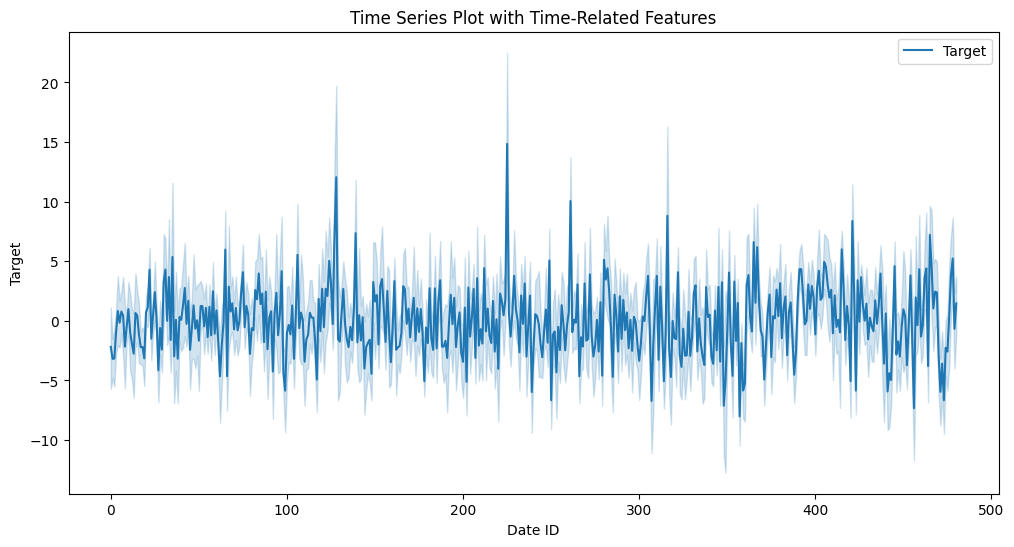

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_138' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_138, x='date_id', y='target', label='Target')


plt.title('Time Series Plot with Time-Related Features')
plt.xlabel('Date ID')
plt.ylabel('Target')
plt.legend()
plt.show()


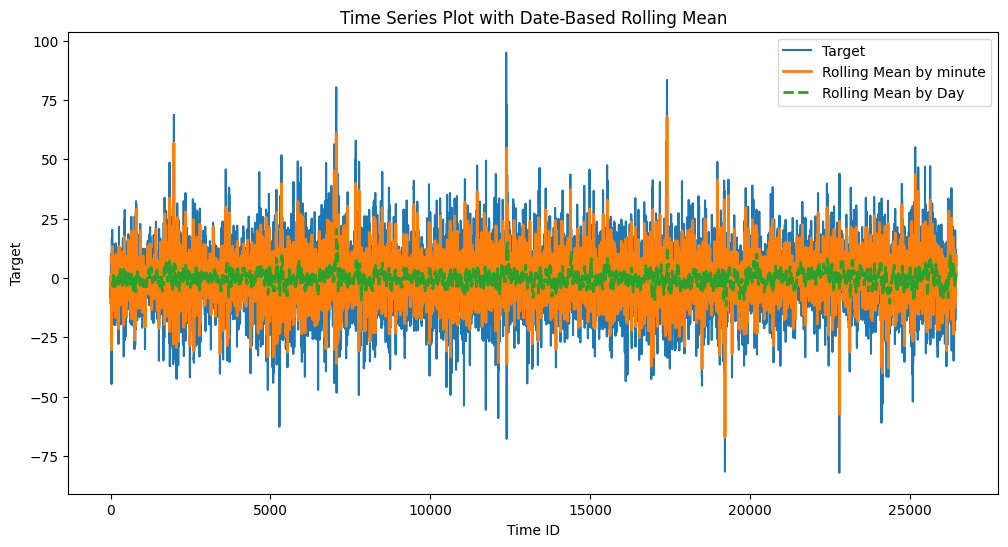

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stock_138' is your DataFrame with the new features

# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_138, x='time_id', y='target', label='Target')

# Calculate rolling statistics with rolling window size based on 'date_id' groups
rolling_window_size = 54
rolling_window = stock_138.set_index('time_id').rolling(window=rolling_window_size)['target']

# Calculate rolling statistics with rolling window size based on each minute
rolling_window_size = 6
rolling_window_minute = stock_138.set_index('time_id').rolling(window=rolling_window_size)['target']


# Plot the rolling mean
minute_rolling_mean = rolling_window_minute.mean()
plt.plot(minute_rolling_mean, label='Rolling Mean by minute', linestyle='-', linewidth=2)

# Plot the rolling mean
rolling_mean = rolling_window.mean()
plt.plot(rolling_mean, label='Rolling Mean by Day', linestyle='--', linewidth=2)


plt.title('Time Series Plot with Date-Based Rolling Mean')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.legend()
plt.show()


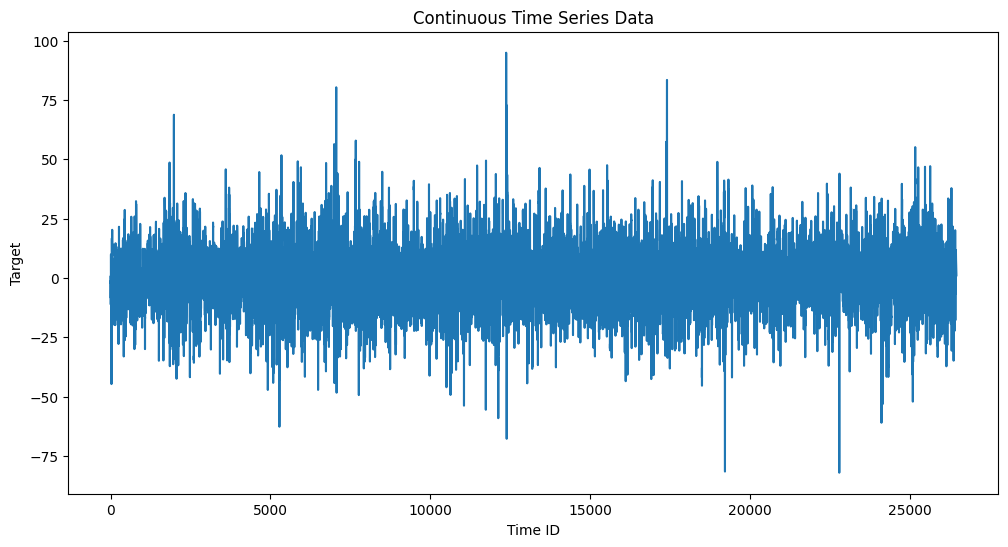

In [21]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(stock_138['time_id'], stock_138['target'])
plt.title('Continuous Time Series Data')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.show()

# **Dickey Fuller Test**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [57]:
# Check Stationarity (Dickey-Fuller test)
result = adfuller(stock_138['target'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('The data is stationary as the ADF statistic value is negative')

ADF Statistic: -31.445103674517505
p-value: 0.0
The data is stationary as the ADF statistic value is negative


Negative value indicates the data is stationary.

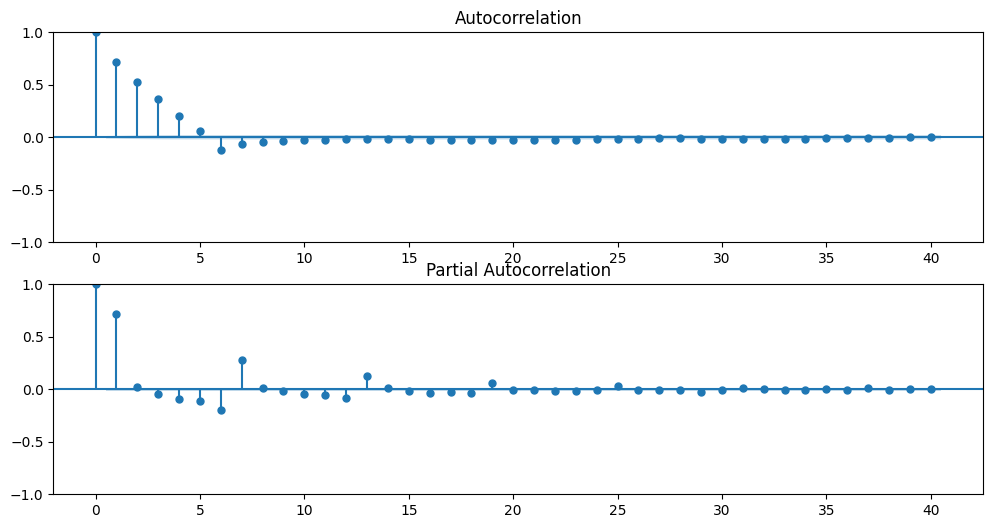

In [24]:
# ACF and PACF analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(stock_138['target'], lags=40, ax=ax1)
plot_pacf(stock_138['target'], lags=40, ax=ax2)
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('/content/drive/MyDrive/train.csv')

class VisualAnalysis():

    def __init__(self, df):
        self.df = df

    def _create_figure(self, n_rows, n_cols, title):
        width, height = 15, n_rows * 3
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(width, height))
        fig.tight_layout(pad=5.0)
        fig.suptitle(title, fontsize=24, y=1.05)
        return ax.flatten()

    def _set_uniform_ylim(self, n_plots, ax):
        min_vals, max_vals = [], []
        for i in range(n_plots):
            _, y_data = zip(*ax[i].collections[0].get_offsets())
            y_data = np.array(y_data)[~np.isnan(y_data)]
            min_vals.append(y_data.min())
            max_vals.append(y_data.max())

        min_val, max_val = np.min(min_vals), np.max(max_vals)

        for i in range(n_plots):
            ax[i].set_ylim(min_val, max_val)

        return ax

    def _hide_empty_subplots(self, n_rows, n_cols, n_plots, ax):
        total_plots = n_cols * n_rows
        for i in range(n_plots, total_plots):
            ax[i].set_axis_off()

        return ax

    def plot_stock_specific_distribution(self, n_cols, n_plots, features):
        n_rows = math.ceil(n_plots / n_cols)

        for feature in features:
            title = f'Stock Specific Distribution of {feature}'
            ax = self._create_figure(n_rows, n_cols, title)
            ax = self._plot_stock_specific_distribution(n_plots, ax, feature)
            ax = self._set_uniform_ylim(n_plots, ax)
            ax = self._hide_empty_subplots(n_rows, n_cols, n_plots, ax)
            plt.show()

    def _plot_stock_specific_distribution(self, n_plots, ax, feature):
        n_stocks = self.df['stock_id'].nunique()
        for i in range(n_plots):
            stock_id = 138  # Change to 138 for stock-specific analysis
            stock_data = self.df[self.df['stock_id'] == stock_id]

            ax[i].scatter(stock_data['seconds_in_bucket'], stock_data[feature],
                s=5, alpha=0.6, c=stock_data[feature], cmap='coolwarm')
            ax[i].set_title(f'Stock {stock_id}')

        return ax

    def plot_general_distribution(self, n_cols, features):
        n_plots = len(features)
        n_rows = math.ceil(n_plots / n_cols)

        self._plot_boxplots(n_rows, n_cols, n_plots, features)
        self._plot_histplots(n_rows, n_cols, n_plots, features)

    def _plot_boxplots(self, n_rows, n_cols, n_plots, features):
        title = 'General Distribution with Boxplots'
        ax = self._create_figure(n_rows, n_cols, title)

        for i, feature in enumerate(features):
            sns.boxplot(x=np.log(self.df[feature]), ax=ax[i])
            ax[i].set_title(f'{feature}')
            ax[i].set_xlabel(None)

        ax = self._hide_empty_subplots(n_rows, n_cols, n_plots, ax)

        plt.show()

    def _plot_histplots(self, n_rows, n_cols, n_plots, features):
        title = 'General Distribution with Histograms'
        ax = self._create_figure(n_rows, n_cols, title)

        for i, feature in enumerate(features):
            sns.histplot(x=np.log(self.df[feature]), bins=50, ax=ax[i],
                kde=True)
            ax[i].set_title(f'{feature}')
            ax[i].set_xlabel(None)

        ax = self._hide_empty_subplots(n_rows, n_cols, n_plots, ax)

        plt.show()

    def plot_correlation(self):
        mask = np.triu(self.df.corr())

        _, ax = plt.subplots(figsize=(12, 12))
        sns.heatmap(self.df.corr(), square=True, annot=True, fmt='.2f',
            mask=mask, cmap='coolwarm', ax=ax, vmin=-1, vmax=1)

        plt.title('Correlation Matrix', fontsize=24)


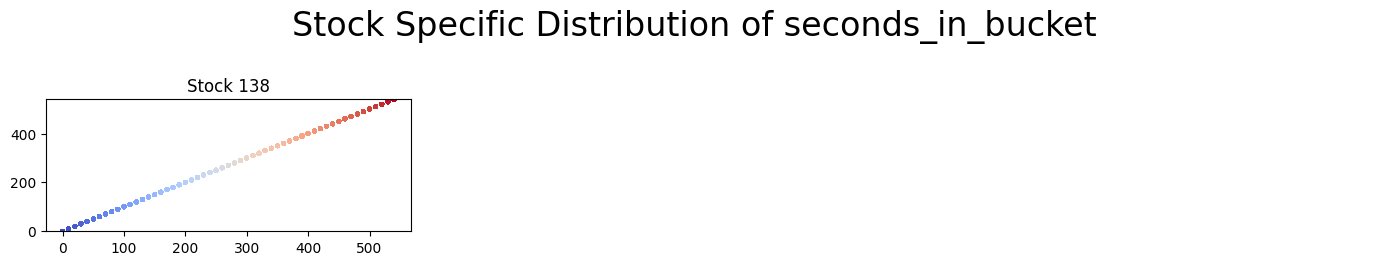

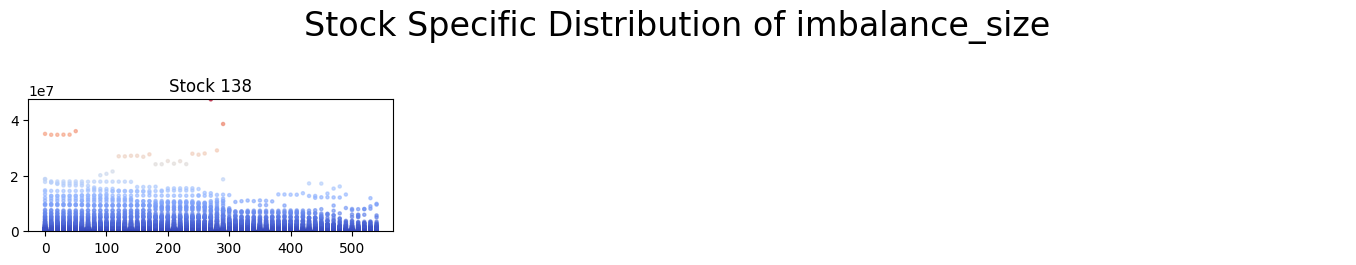

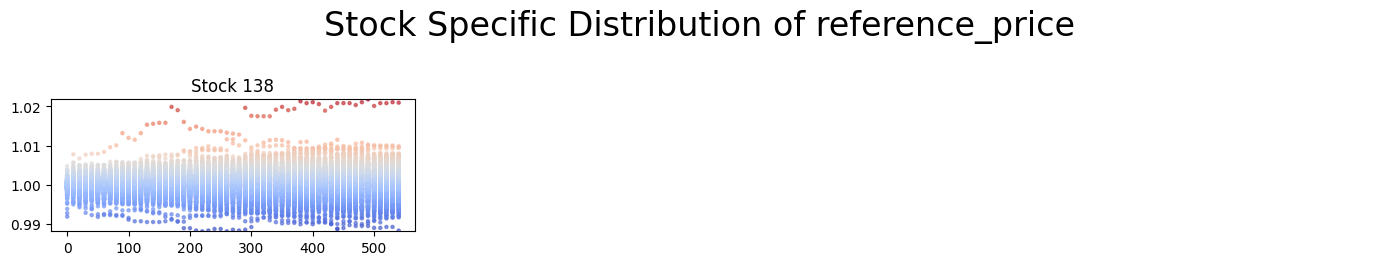

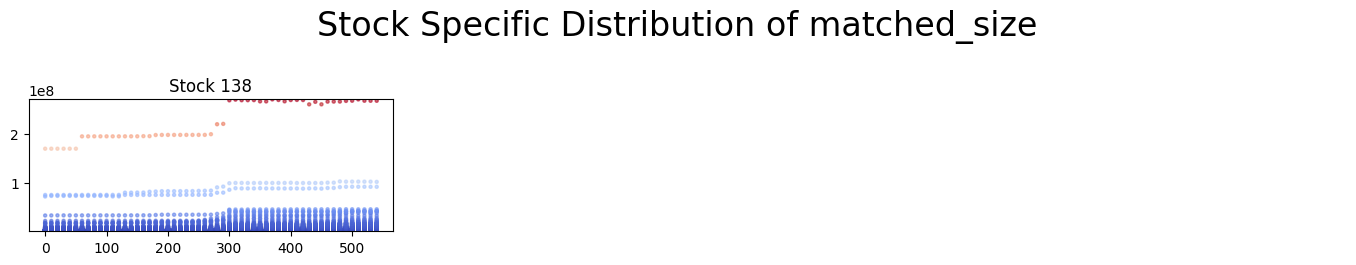

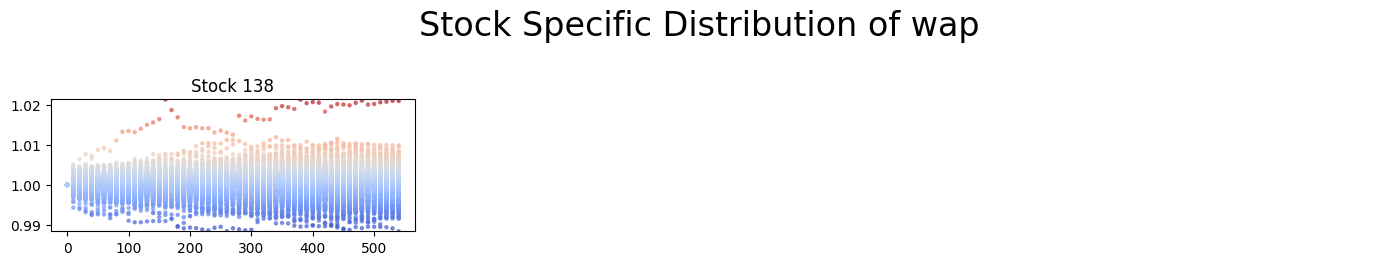

<ipython-input-45-f0ce858ef5d6>:25: UserWarning: Warning: converting a masked element to nan.
  y_data = np.array(y_data)[~np.isnan(y_data)]


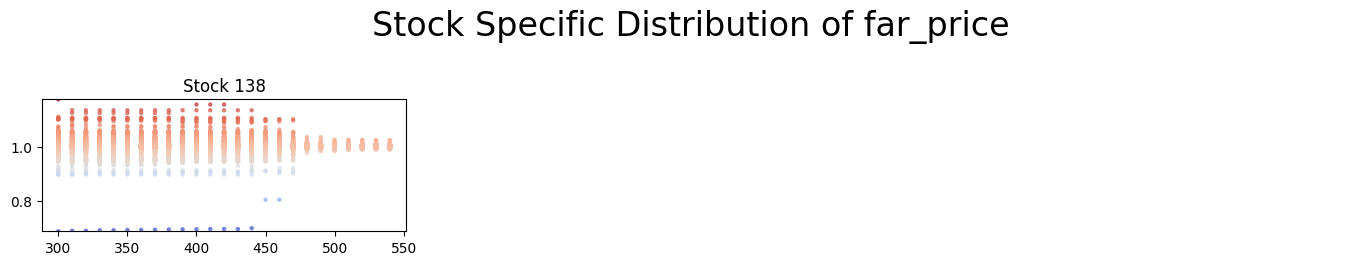

In [46]:
va = VisualAnalysis(df)

# Plot stock-specific distributions
n_cols_stock = 3  # Set the number of columns for stock-specific plots
n_plots_stock = 1  # Set the number of plots for stock-specific plots
features_stock = ['seconds_in_bucket', 'imbalance_size', 'reference_price', 'matched_size', 'wap', 'far_price']

va.plot_stock_specific_distribution(n_cols_stock, n_plots_stock, features_stock)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


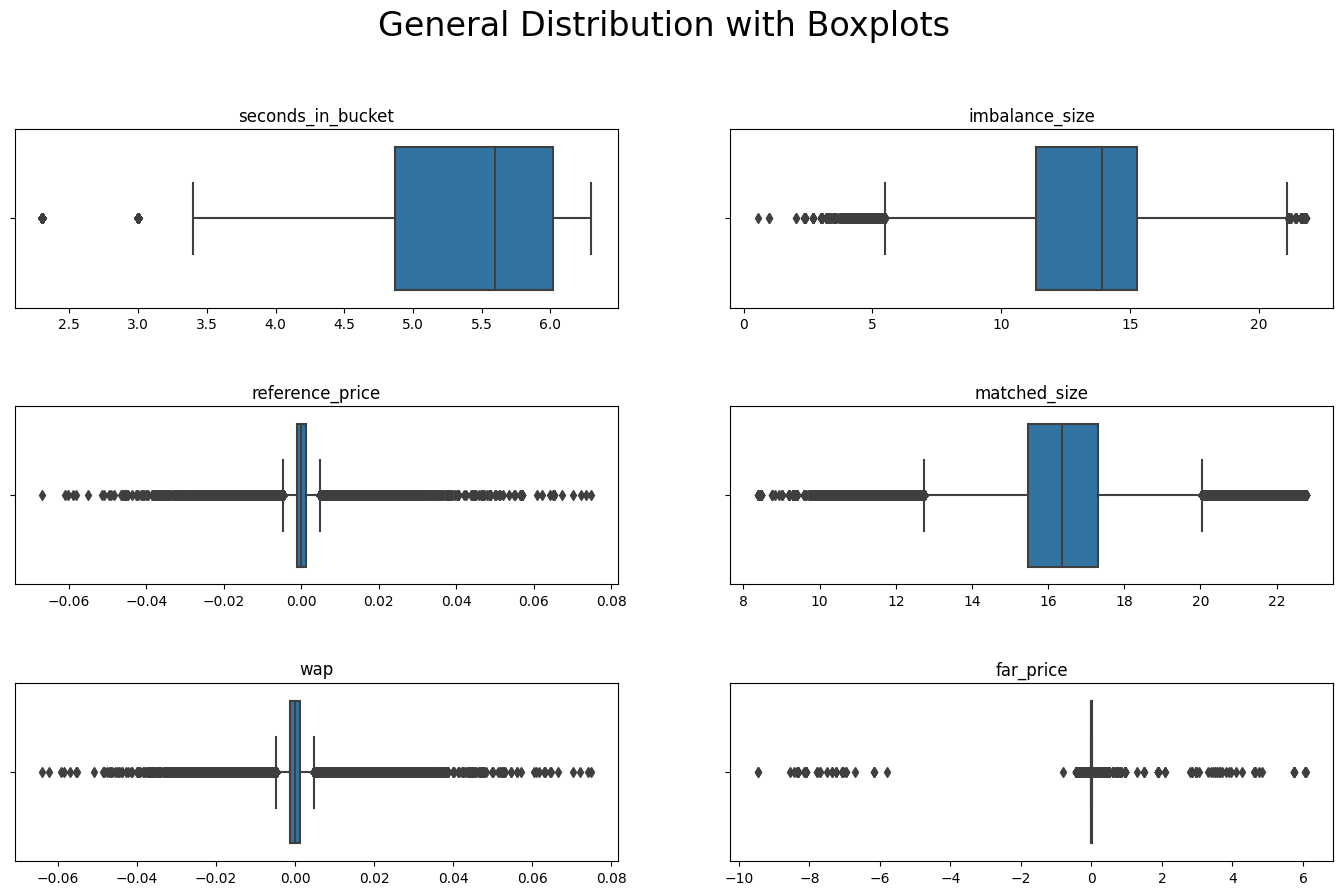

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


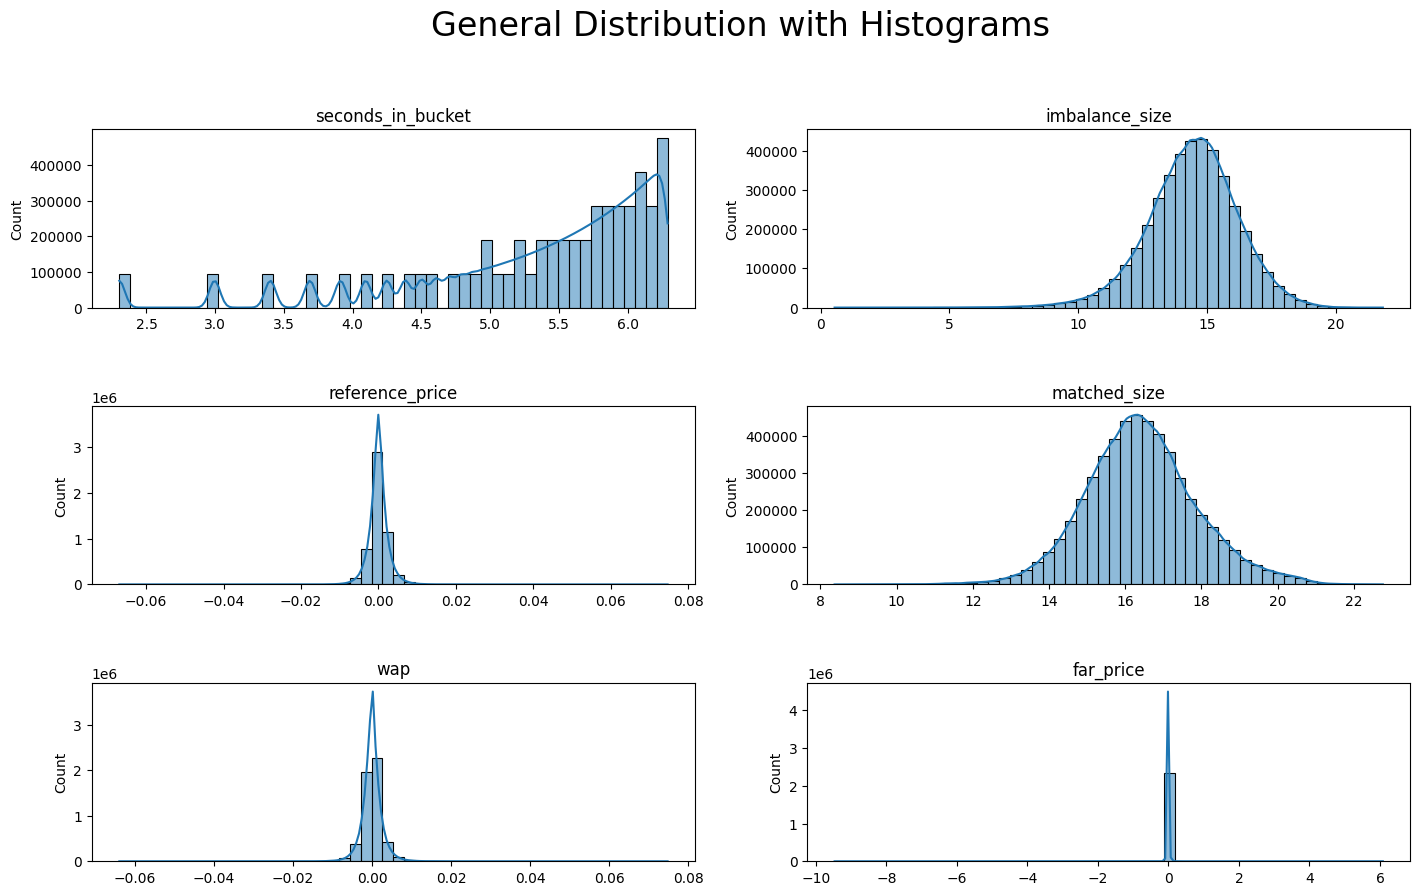

In [47]:
# Initialize VisualAnalysis object
va = VisualAnalysis(df)

# Plot general distributions
n_cols_general = 2  # Set the number of columns for general plots
features_general = ['seconds_in_bucket', 'imbalance_size', 'reference_price', 'matched_size', 'wap', 'far_price']

va.plot_general_distribution(n_cols_general, features_general)

<ipython-input-45-f0ce858ef5d6>:101: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(self.df.corr())
<ipython-input-45-f0ce858ef5d6>:104: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(), square=True, annot=True, fmt='.2f',


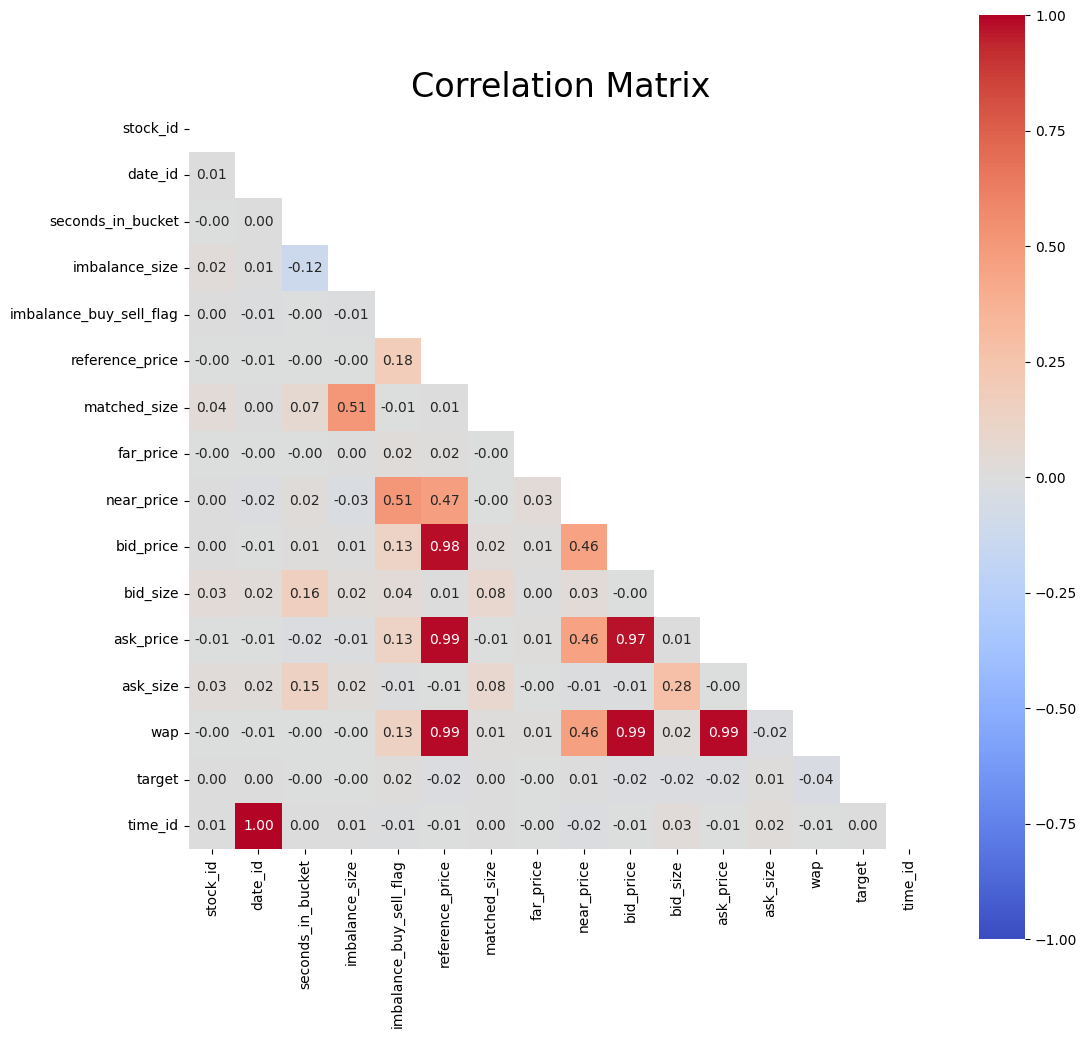

In [48]:
# Initialize VisualAnalysis object
va = VisualAnalysis(df)

# Plot correlation matrix
va.plot_correlation()

consider q=5 p=1

In [25]:
# Select p and q values
p = 1
d = 1
q = 1

In [26]:
# Fit the ARIMA model
model = ARIMA(stock_138['target'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
# Reset the index
df_stock_138.reset_index(drop=True, inplace=True)

# Build ARIMA model for stock 138
order = (1, 1, 2)  # Example order, you may need to tune this
model = ARIMA(df_stock_138[feature], order=order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    wap   No. Observations:                26455
Model:                 ARIMA(1, 1, 2)   Log Likelihood              151643.392
Date:                Fri, 17 Nov 2023   AIC                        -303278.784
Time:                        09:19:14   BIC                        -303246.051
Sample:                             0   HQIC                       -303268.218
                              - 26455                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3027      0.002    139.044      0.000       0.298       0.307
ma.L1         -0.3835      0.002   -186.583      0.000      -0.388      -0.379
ma.L2         -0.0095      0.005     -1.776      0.0

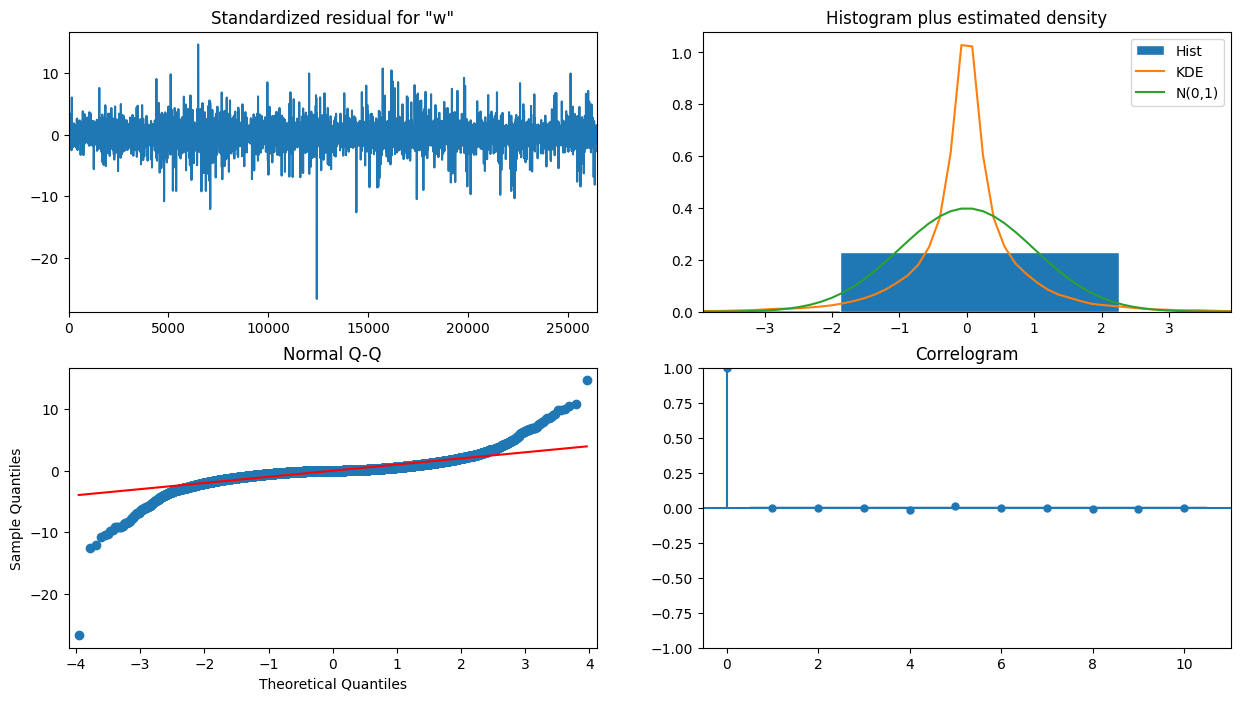

In [65]:
# Plot diagnostics for ARIMA
model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

##Model Evaluation

In [27]:
# Step 8: Forecast the next 6 steps
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
print(f'Forecasted Values for Next {forecast_steps} Steps: {forecast}')

Forecasted Values for Next 6 Steps: 26455    0.611008
26456    0.433545
26457    0.306808
26458    0.216297
26459    0.151658
26460    0.105495
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Handling Missing Values

stock_138.isna().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  14625
near_price                 14430
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
minute_of_day                  0
day_of_week                    0
dtype: int64

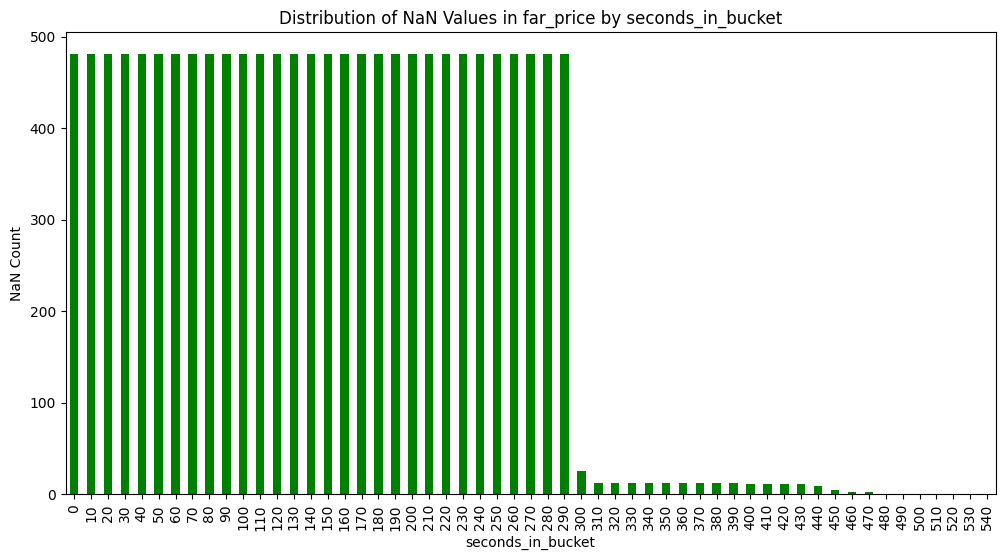

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named 'stock_138'
# Replace 'stock_138' with your actual DataFrame name

# Group the data by 'seconds_in_bucket' and calculate the count of NaN values in 'far_price'
nan_count = stock_138.groupby('seconds_in_bucket')['far_price'].apply(lambda x: x.isna().sum())

# Create a bar chart to visualize the distribution of NaN values
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='green')
plt.title('Distribution of NaN Values in far_price by seconds_in_bucket')
plt.xlabel('seconds_in_bucket')
plt.ylabel('NaN Count')
plt.xticks(rotation=90)
plt.show()


In [49]:

stock_138.sort_values(by=['date_id', 'seconds_in_bucket'], inplace=True)


stock_138[stock_138['date_id'] == 1]


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,minute_of_day,day_of_week
10638,138,1,0,121748.26,-1,1.000918,318687.28,NaN,NaN,0.999865,75.94,1.002498,1408.59,1.000000,-10.039806,55,1_0_138,0,1
10829,138,1,10,87038.99,-1,0.999865,353396.54,NaN,NaN,0.999865,75.94,1.001708,3804.00,0.999901,-15.749931,56,1_10_138,0,1
11020,138,1,20,87038.99,-1,0.999865,353396.54,NaN,NaN,0.999865,3075.57,1.000918,5283.39,1.000253,-17.200111,57,1_20_138,0,1
11211,138,1,30,87038.99,-1,0.998812,353396.54,NaN,NaN,0.998812,3793.00,1.000128,3798.00,0.999470,-6.809831,58,1_30_138,0,1
11402,138,1,40,87038.99,-1,0.999075,353396.54,NaN,NaN,0.998812,3793.00,1.000128,3798.00,0.999470,-5.139709,59,1_40_138,0,1
11593,138,1,50,87038.99,-1,0.998812,353396.54,NaN,NaN,0.998812,4020.58,0.999602,1973.92,0.999342,-6.110072,60,1_50_138,0,1
11784,138,1,60,87038.99,-1,0.998022,353396.54,NaN,NaN,0.997758,3789.00,0.999338,2087.25,0.998778,-0.730157,61,1_60_138,1,1
11975,138,1,70,86849.12,-1,0.998022,353586.42,NaN,NaN,0.997758,3789.00,0.999602,11919.44,0.998204,1.610518,62,1_70_138,1,1
12166,138,1,80,86849.12,-1,0.998022,353586.42,NaN,NaN,0.997758,3789.00,0.999338,3795.00,0.998548,-1.059771,63,1_80_138,1,1
12357,138,1,90,86659.24,-1,0.998022,353776.29,NaN,NaN,0.997758,8487.36,0.999338,3795.00,0.998851,-2.539754,64,1_90_138,1,1


In [50]:

# Fill missing values in 'far_price' and 'near_price' columns with zeros
stock_138['far_price'].fillna(0, inplace=True)
stock_138['near_price'].fillna(0, inplace=True)


split_percentage = 0.8  # 80% for training, 20% for testing
split_index = int(len(stock_138) * split_percentage)

# Split the data into training and testing sets
train_data = stock_138.iloc[:split_index]
test_data = stock_138.iloc[split_index:]

print(len(train_data), len(test_data))

21164 5291
